In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data for each loc
x_locs = [-7, -4.5, -2, 1, 2]
les_line_folder = r'E:\LES_Manchester\UoM_TJ_LES-20211013T183109Z-001\UoM_TJ_LES\lines'
struct_line_folder = r'E:\project1_Manchester\CFD_Manchester\1_FullModel\Struct\1p5mm_v2_ManchesterInlet\Lines'
cubic_folder = r'E:\project1_Manchester\CFD_Manchester\1_FullModel\Cubic'

In [3]:
from valcode.manchester import ManchesterLineData
from valcode.mydata import *

In [4]:
loc = x_locs[0]



In [8]:
sorted(struct_coord)

[-0.0534600000000007,
 -0.0529200000000002,
 -0.0523799999999995,
 -0.051839999999999,
 -0.0512999999999994,
 -0.050759999999999,
 -0.0502200000000008,
 -0.0496800000000004,
 -0.0491400000000008,
 -0.0486000000000003,
 -0.0480599999999996,
 -0.0475199999999991,
 -0.0469799999999996,
 -0.0464399999999992,
 -0.0459000000000007,
 -0.0453600000000002,
 -0.0448200000000008,
 -0.0442800000000004,
 -0.0437399999999997,
 -0.0431999999999993,
 -0.0426599999999999,
 -0.0421199999999996,
 -0.0415800000000005,
 -0.0410400000000001,
 -0.0405000000000008,
 -0.0399600000000005,
 -0.0394199999999998,
 -0.0388799999999994,
 -0.0383400000000002,
 -0.0378,
 -0.0372600000000003,
 -0.03672,
 -0.0361800000000008,
 -0.0356400000000005,
 -0.0350999999999999,
 -0.0345599999999996,
 -0.0340200000000006,
 -0.0334800000000004,
 -0.03294,
 -0.0323999999999998,
 -0.0318600000000008,
 -0.0313200000000002,
 -0.03078,
 -0.0302399999999993,
 -0.0296999999999992,
 -0.0291600000000002,
 -0.02862,
 -0.0280799999999994,
 -

In [23]:
mscs_Umean[~np.isnan(mscs_Umean)].min()

0.203128

In [27]:
def select_data(data_obj):
    coord = data_obj.vertical.Umean.coord
    value = data_obj.vertical.Umean.U

    min_value = value[~np.isnan(value)].min()
    return sorted(coord), value[coord.argsort()]-min_value

Cubic doesn't have TKE data. 
Cubic doesn't have Temperature data
Cubic doesn't have TKE data. 
Cubic doesn't have Temperature data
Cubic doesn't have TKE data. 
Cubic doesn't have Temperature data
Cubic doesn't have TKE data. 
Cubic doesn't have Temperature data
Cubic doesn't have TKE data. 
Cubic doesn't have Temperature data


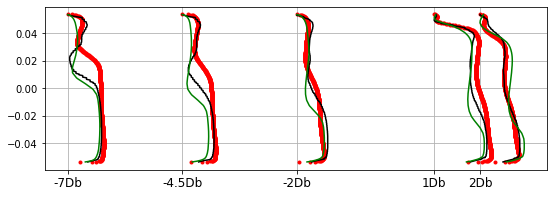

In [28]:
scaling_fac = 1
fig, ax =  plt.subplots(1,1, figsize=(9, 3))

for loc in x_locs:
    # Initiate data
    mscs = ManchesterLineData(les_line_folder, loc=loc)
    struct = MyLineData(struct_line_folder, loc, f_read_Umean=read_struct_Umean, f_read_tke=read_struct_tke, f_read_Tmean=read_struct_Tmean)
    cubic = MyLineData(cubic_folder, loc, read_cubic_Umean, read_cubic_tke, read_cubic_Tmean)


    # Umean 
    mscs_coord, mscs_Umean = select_data(mscs)
    struct_coord, struct_Umean = select_data(struct)
    cubic_coord, cubic_Umean = select_data(cubic)

    ax.plot(mscs_Umean+ loc*scaling_fac, mscs_coord, 'r.', label='les')
    ax.plot(struct_Umean+ loc*scaling_fac, struct_coord, 'k', label='struct')
    ax.plot(cubic_Umean+ loc*scaling_fac, cubic_coord, 'g', label='struct')
    # plt.legend()

ax.set_xticks(x_locs)
ax.set_xticklabels(['%sDb' % x for x in x_locs], fontsize=12)
ax.grid()
